# 信用卡欺诈分析：
https://www.kaggle.com/mlg-ulb/creditcardfraud

**数据概况**

1. 数据样本：2013年9月份两天时间内的信用卡交易数据， 共284807笔交易，其中492笔欺诈行为
2. 特征描述：数据样本包括了28个特征V1，V2，……V28，以及交易时间Time和交易金额Amoun，因为数据隐私，28个特征值是通过PCA变换得到的结果。

**预测任务**

需要预测每笔交易的分类Class，该笔交易是否为欺诈
    1. Class=0为正常（非欺诈）
    2. Class=1代表欺诈


# 数据探索

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv('./creditcard.csv')
data.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [4]:
data.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,3.919560e-15,5.688174e-16,-8.769071e-15,2.782312e-15,-1.552563e-15,2.010663e-15,-1.694249e-15,-1.927028e-16,-3.137024e-15,...,1.537294e-16,7.959909e-16,5.367590e-16,4.458112e-15,1.453003e-15,1.699104e-15,-3.660161e-16,-1.206049e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


In [60]:
# 数据变量类型
numeric_col = [x for x in data.columns.tolist() if x not in ['Time', 'Class']]
label_col = ['Class']
useless_col = ['Time']

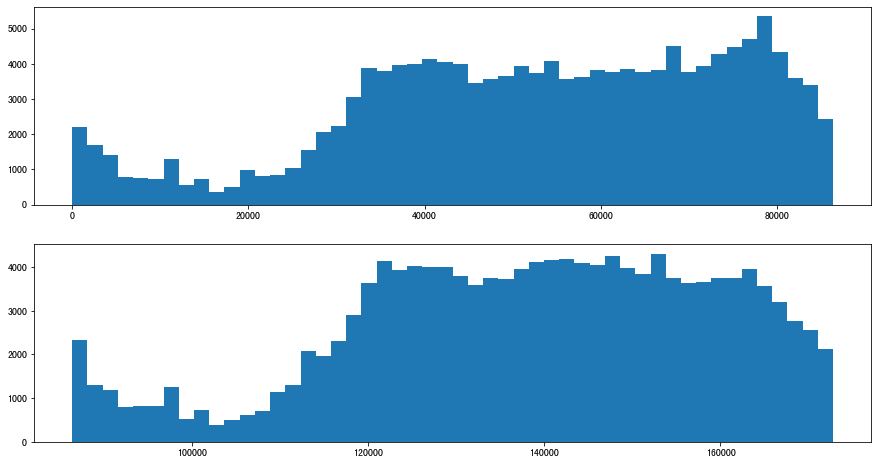

In [61]:
# 两天样本分布
day_1 = data.query('Time <= {}'.format(data['Time'].max()/2))['Time']
day_2 = data.query('Time > {}'.format(data['Time'].max()/2))['Time']

fig, ax = plt.subplots(2,1,figsize=(15,8))
for idx, i in enumerate([day_1, day_2]):
    ax[idx].hist(x=i, bins=50)

plt.show()

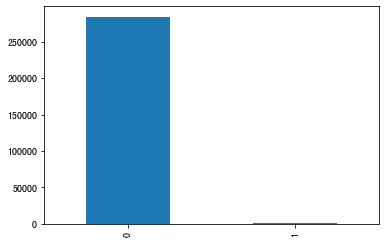

In [62]:
# 标签分布
data['Class'].value_counts().plot(kind='bar')
plt.show()

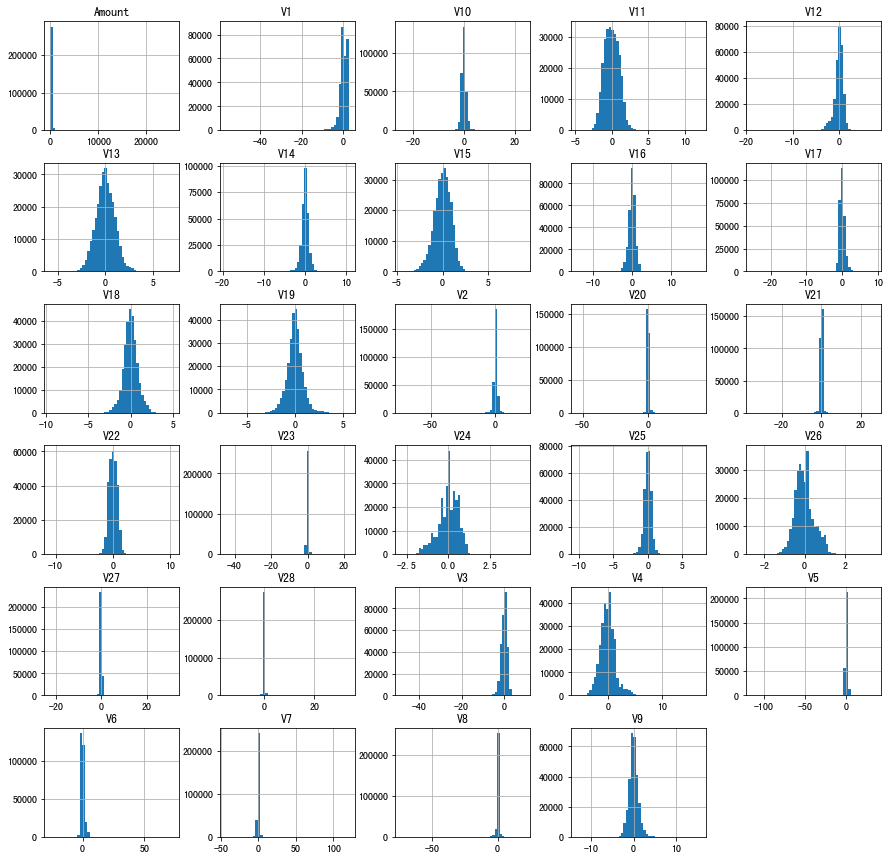

In [63]:
# 变量分布
data[numeric_col].hist(bins=50, figsize=(15,15))
plt.show()

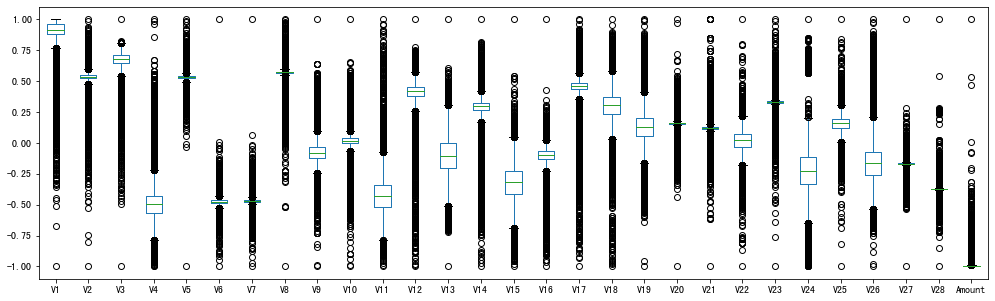

In [77]:
# 最大最小化后看分布情况
df_temp = data.copy()
for col in numeric_col:
    max_ = data[col].max()
    min_ = data[col].min()
    df_temp[col] = 2 * (data[col] - min_) / (max_ - min_) - 1

df_temp[numeric_col].plot(kind='box',figsize=(17, 5))
plt.show()

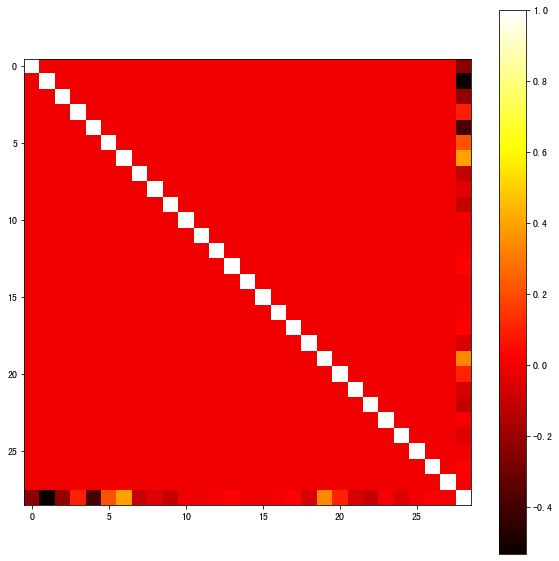

In [79]:
# 相关性
plt.figure(figsize=(10,10))
plt.imshow(data[numeric_col].corr(), cmap='hot')
plt.colorbar()
plt.show()

# 数据规范化

In [82]:
from sklearn.preprocessing import StandardScaler

In [98]:
ss = StandardScaler()
x = ss.fit_transform(data[numeric_col])
y = data['Class'].values

# 数据拆分

In [222]:
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE

In [277]:
# 数据拆分
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.33, random_state=529)

# # 平衡采样（只平衡训练集）
# smote = SMOTE(k_neighbors=5)
# x_train, y_train = smote.fit_sample(x_train, y_train)

# 查看训练数据
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(190820, 29)
(190820,)
(93987, 29)
(93987,)


In [280]:
# # 平衡处理后
# pd.DataFrame(y_train, columns=['target'])['target'].value_counts().plot(kind='bar')
# plt.show()

# 模型评估

1. 综合效果 LightGBM 的效果最好，平衡和精确度和召回的F1值最高，其他两个值也是整体排前的
2. 从业务角度上看，我们会更看重召回，因为对于诈欺，宁愿多杀错（多怀疑）也不要漏掉，SVM 的召回最高

**baseline模型**

| |acc|pre|rec|f1|summary|
|--|--|--|--|--|--|
|LogisticRegression| 99.91%|55.19% |83.33% |66.41% |做了样本平衡后效果反而更差|
|DecisionTree|99.92% |72.08% |75.51% |73.75%|\|
|SVM|99.93% |61.04% |93.07% | 73.73%|召回最高|
|GBDT|99.92% |66.23% |79.07% |72.08% |\|
|GBDT+LR|99.93% |69.11% |88.08% | 77.45%|整体不错，召回也高|
|LightGBM|99.94% |77.92% |82.76% | 80.27%|class_weight='balanced'|


**网格搜索后结果**

| |acc|pre|rec|f1|summary|
|--|--|--|--|--|--|
|LightGBM(best)|99.95% |77.27% |92.95% | 84.10%|网格搜索最好结果|

# 模型调优

In [311]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.ensemble import GradientBoostingClassifier
from lightgbm import LGBMClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

In [317]:
# LightGBM
parmeters_LightGBM = {
    'boosting_type': ['gbdt', 'dart', 'goss'],
    'learning_rate': [0.1, 0.05, 0.01],
    'class_weight' :['balanced'],
    'n_estimators': [300, 500, 700],
    'importance_type': ['split', 'gain'],
    'reg_alpha':[0.0, 1.0, 2.0],
    'reg_lambda':[0.0, 1.0, 2.0],
}

# SVM
parmeters_svm = {
    'kernel': ['linear', 'poly', 'rbf', 'sigmoid'],
    'C': [1.0, 1.5, 2.0],
    'class_weight': [None, 'balanced']
}

In [313]:
# LightGBM
grid = GridSearchCV(estimator=LGBMClassifier(), param_grid=parmeters_LightGBM, verbose=1, scoring='f1')
grid.fit(x_train, y_train)
predict = grid.predict(x_test)

Fitting 5 folds for each of 486 candidates, totalling 2430 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 2430 out of 2430 | elapsed: 1105.4min finished


In [314]:
grid.best_score_

0.8827429503747439

In [315]:
grid.best_params_

{'boosting_type': 'gbdt',
 'class_weight': 'balanced',
 'importance_type': 'split',
 'learning_rate': 0.05,
 'n_estimators': 500,
 'reg_alpha': 0.0,
 'reg_lambda': 0.0}

In [316]:
print('acc: {:.2f}%'.format(accuracy_score(predict, y_test)*100))
print('pre: {:.2f}%'.format(precision_score(predict, y_test)*100))
print('rec: {:.2f}%'.format(recall_score(predict, y_test)*100))
print('f1: {:.2f}%'.format(f1_score(predict, y_test)*100))

acc: 99.95%
pre: 77.27%
rec: 92.25%
f1: 84.10%


In [320]:
# svm
grid_svm = GridSearchCV(estimator=SVC(), param_grid=parmeters_svm, verbose=1, scoring='f1')
grid_svm.fit(x_train, y_train)
predict = grid_svm.predict(x_test)

Fitting 5 folds for each of 24 candidates, totalling 120 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 120 out of 120 | elapsed: 1922.8min finished


In [321]:
grid_svm.best_score_

0.8260078612124705

In [322]:
grid_svm.best_params_

{'C': 1.5, 'class_weight': None, 'kernel': 'poly'}

In [323]:
print('acc: {:.2f}%'.format(accuracy_score(predict, y_test)*100))
print('pre: {:.2f}%'.format(precision_score(predict, y_test)*100))
print('rec: {:.2f}%'.format(recall_score(predict, y_test)*100))
print('f1: {:.2f}%'.format(f1_score(predict, y_test)*100))

acc: 99.94%
pre: 73.38%
rec: 85.61%
f1: 79.02%


In [324]:
#svm
svc = SVC()
svc.fit(x_train, y_train)
result = svc.predict(x_test)
print('acc: {:.2f}%'.format(accuracy_score(result, y_test)*100))
print('pre: {:.2f}%'.format(precision_score(result, y_test)*100))
print('rec: {:.2f}%'.format(recall_score(result, y_test)*100))
print('f1: {:.2f}%'.format(f1_score(result, y_test)*100))

acc: 99.93%
pre: 61.04%
rec: 93.07%
f1: 73.73%
